# Assessing the Impact of Daylight Savings Time on Driving Fatalities

- Anastasiades, Andrew
- Drozdzewicz, Peter
- Garcia, Viera
- Sperry, Taylor
- Surapanemi, Sindhura

### DEPENDENCIES

In [2]:
import pandas as pd #data manipulation
import os #Interoperability
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import datetime as dt

### FILE PATHS

In [3]:
accident_csv = os.path.join("Resources", "2019.csv")

### LOAD DATAFRAME

In [4]:
## We inspected the original CSV and chose the columns we believed were pertinent
columns_to_keep = ['STATENAME', 'DAY', 'MONTH','YEAR','HOUR','DAY_WEEK','DAY_WEEKNAME', 'LGT_CONDNAME',
                   'DRUNK_DR', 'WEATHERNAME', 'RUR_URBNAME', 'FATALS',]
df = pd.read_csv(accident_csv, usecols=columns_to_keep)

### CLEAN DATAFRAME

In [5]:
# EXCLUDE DRUNK DRIVERS #Why do we do this?
df = df[df["DRUNK_DR"]==0] 
df.drop(axis=1, labels=["DRUNK_DR"], inplace=True)

# ADD DATE AND WEEKNUM
# We do this so we can compare week to week changes
df["DATE"] = pd.to_datetime(df[["YEAR", "MONTH", "DAY"]])
#df["WEEK_NUM"] = df["DATE"].dt.week
df['WEEK_NUM'] = df['DATE'].apply(lambda x: (x + dt.timedelta(days=1)).week)

# SPLIT SAMPLE AND CONTROL
control_states = ["Arizona", "Hawaii"] #These states do not observe DLS
control_df = df[df.loc[:,'STATENAME'].isin(control_states)] #NO DLS
sample_df = df[~df.loc[:,'STATENAME'].isin(control_states)] #DLS

sample_df

,STATENAME,DAY,MONTH,YEAR,DAY_WEEK,DAY_WEEKNAME,HOUR,RUR_URBNAME,LGT_CONDNAME,WEATHERNAME,FATALS,DATE,WEEK_NUM
1,Alabama,23,1,2019,4,Wednesday,18,Urban,Dark - Not Lighted,Rain,1,2019-01-23,4
2,Alabama,22,1,2019,3,Tuesday,19,Rural,Dark - Not Lighted,Cloudy,1,2019-01-22,4
3,Alabama,22,1,2019,3,Tuesday,3,Rural,Dark - Not Lighted,Clear,1,2019-01-22,4
5,Alabama,7,1,2019,2,Monday,12,Rural,Daylight,Clear,1,2019-01-07,2
6,Alabama,2,1,2019,4,Wednesday,9,Rural,Daylight,Cloudy,1,2019-01-02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33236,Wyoming,4,10,2019,6,Friday,15,Rural,Daylight,Clear,1,2019-10-04,40
33237,Wyoming,3,10,2019,5,Thursday,14,Rural,Daylight,Clear,1,2019-10-03,40
33238,Wyoming,27,10,2019,1,Sunday,3,Rural,Dark - Not Lighted,Snow,1,2019-10-27,44
33239,Wyoming,28,9,2019,7,Saturday,18,Rural,Dusk,Severe Crosswinds,1,2019-09-28,39


### DISTRIBUTION OF WEEK-OVER-WEEK CHANGE IN FATALITIES

In [7]:
week_gb = sample_df.groupby(by=["WEEK_NUM"])
week_summary = pd.DataFrame(week_gb["FATALS"].sum())
#week_summary["WEEKLY_CHANGE"]
weekly_change = []
for index, row in week_summary.iterrows(): # WE WANT DELTA! FOR EACH WEEK
    if index==1:
        weekly_change.append(np.nan)
    else:
        this_num = week_summary.loc[index, "FATALS"] # FATALITIES FROM THIS WEEK
        last_num = week_summary.loc[index-1, "FATALS"] # FATALITIES FROM LAST WEEK
        delta = (this_num / last_num) - 1
        weekly_change.append(delta)

week_summary["WEEKLY_CHANGE"] = weekly_change
week_summary["Z_SCORE"] = st.zscore(weekly_change, nan_policy='omit')
week_summary.reset_index(inplace=True)
week_summary

,WEEK_NUM,FATALS,WEEKLY_CHANGE,Z_SCORE
0,1,553,NaN,NaN
1,2,514,-0.070524,-0.946536
2,3,431,-0.161479,-2.159611
3,4,386,-0.104408,-1.398453
4,5,403,0.044041,0.581452
5,6,475,0.178660,2.376888
6,7,424,-0.107368,-1.437932
7,8,414,-0.023585,-0.320494
8,9,396,-0.043478,-0.585816
9,10,404,0.020202,0.263501


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


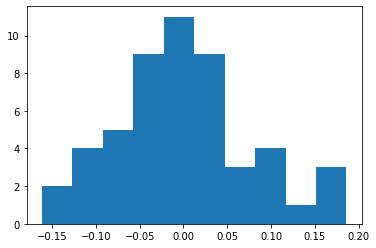

In [5]:
plt.hist(week_summary["WEEKLY_CHANGE"])
plt.show()

In [6]:
week_summary 

,WEEK_NUM,FATALS,WEEKLY_CHANGE,Z_SCORE
0,1,553,NaN,NaN
1,2,514,-0.070524,-0.946536
2,3,431,-0.161479,-2.159611
3,4,386,-0.104408,-1.398453
4,5,403,0.044041,0.581452
5,6,475,0.178660,2.376888
6,7,424,-0.107368,-1.437932
7,8,414,-0.023585,-0.320494
8,9,396,-0.043478,-0.585816
9,10,404,0.020202,0.263501


### Graphing with DAY_WEEKNAME

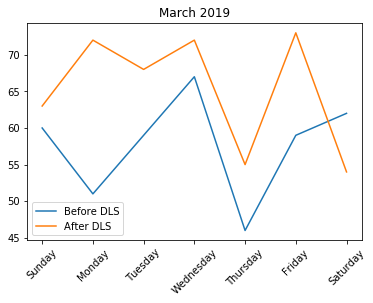

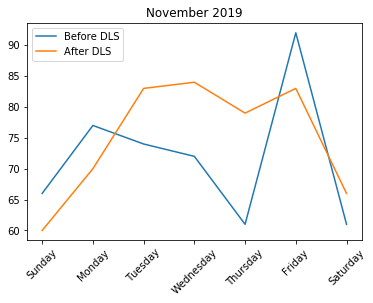

In [7]:
#MARCH 2019 - The switch occurs March 10
week_before = dt.date(2019,3,10).isocalendar()[1] #Determine week of year
week_after = week_before + 1

sample_gb = sample_df.groupby(by=["DATE","WEEK_NUM", "DAY_WEEKNAME"])
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
before = summary[summary["WEEK_NUM"]==week_before]
after = summary[summary["WEEK_NUM"]==week_after]
plt.plot(before["DAY_WEEKNAME"], before["FATALS"], label="Before DLS")
plt.plot(after["DAY_WEEKNAME"], after["FATALS"], label="After DLS")
plt.xticks(rotation = 45)
plt.legend()
plt.title("March 2019")
plt.show()

#NOVEMBER 2019 - The switch occurs November 3
week_before = dt.date(2019,11,3).isocalendar()[1] #Determine week of year (starting on Monday)
week_after = week_before + 1

sample_gb = sample_df.groupby(by=["DATE","WEEK_NUM", "DAY_WEEKNAME"])
summary = pd.DataFrame(sample_gb["FATALS"].sum())
summary.reset_index(inplace=True)
before = summary[summary["WEEK_NUM"]==week_before]
after = summary[summary["WEEK_NUM"]==week_after]

plt.plot(before["DAY_WEEKNAME"], before["FATALS"], label="Before DLS")
plt.plot(after["DAY_WEEKNAME"], after["FATALS"], label="After DLS")
plt.xticks(rotation = 45)
plt.legend()
plt.title("November 2019")
plt.show()